# A beginner’s guide to image processing using NumPy
Since images can also be considered as made up of arrays, we can use NumPy for performing different image processing tasks as well from scratch. In this article, we will learn about the image processing tasks that can be performed only using NumPy.

Mostly we find the uses of NumPy in the problems where we are required to perform mathematical and logical operations on different sizes of arrays. Since images can also be considered as made up of arrays, we can use NumPy for performing different image processing tasks as well from scratch. In this article, we will learn about the image processing tasks that can be performed only using NumPy. This will be helpful for beginners to understand image processing from its very basics. The major operations to be performed using NumPy are listed below, which we will cover in this article.

## Table of contents
1. Loading image
2. Cropping image
3. Colours separation
4. Transformation 
5. Grayscale conversion 
6. Image segmentation

Let’s start with importing libraries and loading a random image.

## Loading image

In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
img = plt.imread('images/Cat.png')

Here we can see the raw form of the image. Since mathematically the images are made up of pixel values in the above output we can see that we have some numbers which define the colours in the image and the image is basically an array or NumPy array. We can also plot the image using the matplotlib library.

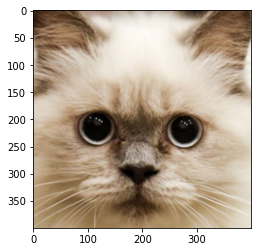

In [4]:
plt.imshow(img)

## Cropping image
After loading the image we are ready to perform actions on the image. As in very basic we can perform basic crop operations on our image. For NumPy, crop operation can be performed by slicing the array.

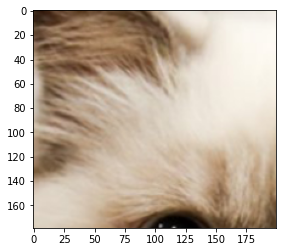

In [5]:
crop_img = img[20:199, :200, :]
plt.imshow(crop_img)

Here we can see that we have cropped our image. Now we can move forward to our next image processing step.

## Colour separation  
Since we know that every image is made of pixel values and these pixel values represent three integers that are known as the RGB value of its colour. To separate the image in these colours we are required to pull out the correct slice of the image array.  

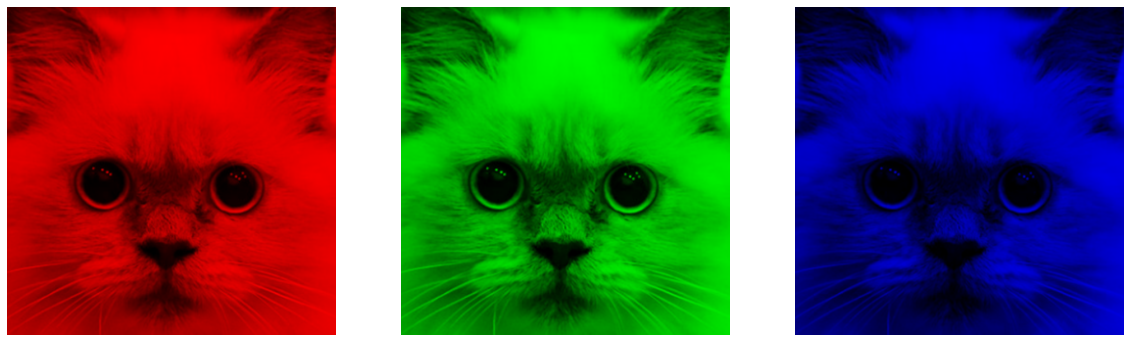

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
for c, ax in zip(range(3), axs):
    rgb_img = np.zeros(img.shape, dtype='uint8')
    rgb_img[:, :, c] = img[:, :, c] * 255
    ax.imshow(rgb_img)
    ax.set_axis_off()

Here in the output, we can see that we have separated the RGB of the image for this we mapped the values in the range 0 to 1 and cast to type uint8. Let’s move toward our next step of image processing.

## Transformations
In this step, we will perform the colour transformation. For this purpose, we can treat the image pixel as a point in space. Treating this way to image pixels allows us to perform a transformation to the colour point. Rotating the colour point can be an example of the above statement. Here we are applying Numpy’s Einstein notation function which is a method of applying a rotation matrix, pixel-wise, to the image. 

In [7]:
def do_normalize(img):
    return -np.log(1/((1 + img) / 257) - 1)

def undo_normalize(img):
    return (1 + 1/(np.exp(img) + 1) * 257).astype("uint8")

def rotation_matrix(theta):
    return np.c_[
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ]

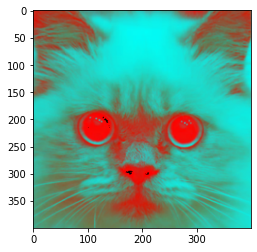

In [8]:
img_norm = do_normalize(img * 255)
img_rot = np.einsum("i j k, lk->ijl", img_norm, rotation_matrix(np.pi))
img1 = undo_normalize(img_rot)
plt.imshow(img1)

Here in the output, we can see that applied sigmoid to colour space worked and we are applying the rotation of the colour of the pixels continuously. Now in the next step, we will look at how we can convert an image to a grayscale image.

## Grayscale conversion
We can also use NumPy for transforming the image into a grayscale image. By Taking the weighted mean of the RGB value of the image we can perform this.

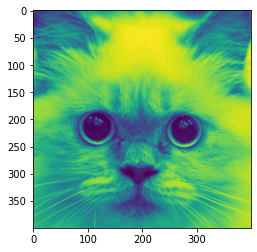

In [9]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[...,:3], rgb_weights)
plt.imshow(grayscale_image)

## Image segmentation
This is one of the most used image processing steps where we segment different regions of images. There are various ways to do so like foreground and background. For example, in this article, we are going to see how we can perform segmentation by converting the image into grayscale and finding a threshold. Pixels in the image that are above the threshold are in one region and others are in another region.

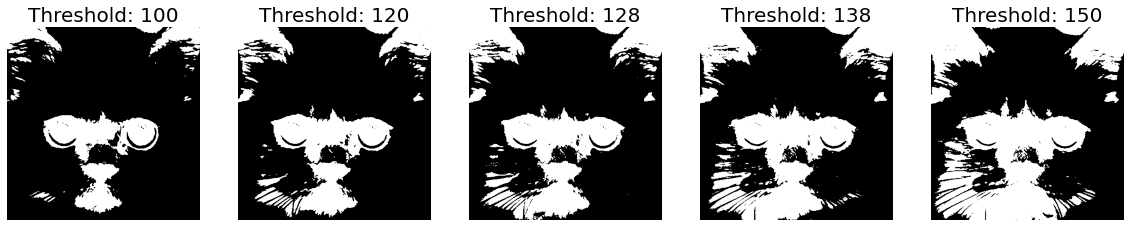

In [10]:
def simple_threshold(image, threshold=128):
    return ((image > threshold) * 255).astype("uint8")

def to_grayscale(img):
    rgb_weights = [0.2989, 0.5870, 0.1140]
    grayscale_image = np.dot(img[...,:3], rgb_weights)
    return grayscale_image

thresholds = [100,120,128,138,150]
fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
gray_im = to_grayscale(img*255)
                        
for t, ax in zip(thresholds, axs):
    ax.imshow(simple_threshold(gray_im, t), cmap='Greys');
    ax.set_title("Threshold: {}".format(t), fontsize=20);
    ax.set_axis_off();

Here in the above output, we can see that we have segmented the image into two regions using different threshold values.
## Final words
In this article, we have discussed different tasks of image processing that we have performed using the NumPy library. Also, we have used the matplotlib library for the visualization of images after processing. By Looking at the above points, we can say that we can perform other tasks as well by just using some other logic. 

# Image processing with numpy
In this section, we will learn how to use NumPy to store and manipulate image data. We will use the Python Imaging Library (PIL) to read and write data to standard file formats.
This article explains how image data is stored in a NumPy array. Other articles include:
- [NumPy image operations](https://www.pythoninformer.com/python-libraries/numpy/image-operations/) - cropping, padding, and flipping images using NumPy.
- [NumPy image transformations](https://www.pythoninformer.com/python-libraries/numpy/image-transforms/) - scaling, rotating, and general affine transforms on images using the ndimage module from the SciPy package.

If you want to learn more about numpy in general, try the other [tutorials](https://www.pythoninformer.com/python-libraries/numpy/).

Before trying these examples you will need to install the NumPy and Pillow packages (Pillow is a fork of the PIL library).

## Creating RGB Images
Here is a 5 by 4 pixel RGB image:

![](images/rgb-image.png)
The image contains 4 lines of pixels. Each line of pixels contains 5 pixels. Each pixel contains 3 bytes (representing the red, green and blue values of the pixel colour):
![](images/image-bytes.png)
RGB images are usually stored as 3-dimensional arrays of 8-bit unsigned integers. The shape of the array is:
`height x width x 3.`

Here is how we create an array to represent a 5 pixel wide by 4 pixel high image:

In [11]:
import numpy as np
width = 5
height = 4
array = np.zeros([height, width, 3], dtype=np.uint8)

Notice that the first dimension is the height, and the second dimension is the width. That is because the data is ordered by lines, then each line is ordered by pixels, and finally, each pixel contains 3-byte values for RGB. Each colour is represented by an unsigned byte (numpy type uint8).

Now let's fill the array with orange pixels (red=255, green=128, blue=0). We use slices to do this, the three values are [broadcast](https://www.pythoninformer.com/python-libraries/numpy/broadcasting/) across all the rows and columns of the array:

In [12]:
array[:,:] = [255, 128, 0]
array.shape

(4, 5, 3)

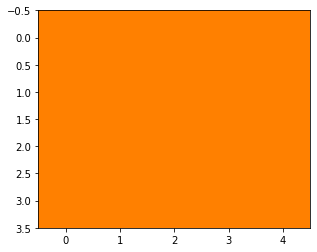

In [13]:
import matplotlib.pylab as plt
plt.imshow(array)

## Saving an RGB image using PIL
Now we can use fromarray to create a PIL image from the NumPy array, and save it as a PNG file:

In [14]:
from PIL import Image

img = Image.fromarray(array)
img.save('testrgb.png')

In the code below we will:
* Create a 200 by 100 pixel array
* Use slice notation to fill the left half of the array with orange
* Use slice notation to fill the right half of the array with blue

Here is the complete code:

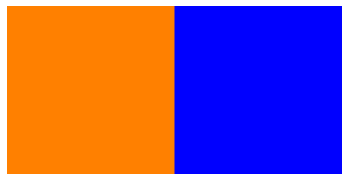

In [15]:
import numpy as np
from PIL import Image

array = np.zeros([100, 200, 3], dtype=np.uint8)
array[:,:100] = [255, 128, 0] #Orange left side
array[:,100:] = [0, 0, 255]   #Blue right side
img = Image.fromarray(array)
img.save('testrgb.png')
plt.imshow(img)
plt.axis('off')
plt.show()

## Creating RGBA images
An RGBA image has 4 channels (unlike an RGB image that has only 3). The fourth channel is an alpha channel. An alpha value of 255 will make the pixel fully opaque, value 0 will make it fully transparent, values in between will make the pixel partly transparent.

In the code below we create an RGBA image, initially setting the same blue and orange areas as before, with an alpha value of 255. We then loop over the image changing the alpha value of each pixel to be equal to its x coordinate. This means that the pixels on the left side of the image will be transparent, and the pixels at the right will be almost fully opaque. The transparency varies smoothly from left to right.:

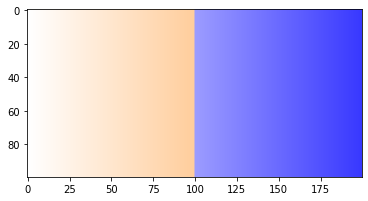

In [16]:
import numpy as np
from PIL import Image

array = np.zeros([100, 200, 4], dtype=np.uint8)
array[:,:100] = [255, 128, 0, 255] #Orange left side
array[:,100:] = [0, 0, 255, 255]   #Blue right side

# Set transparency depending on x position
for x in range(200):
    for y in range(100):
        array[y, x, 3] = x

img = Image.fromarray(array)
img.save('testrgba.png')
plt.imshow(img)

## Creating greyscale images
Greyscale images are handled slightly differently. Because there is only one channel, there is no need to create a 3-dimensional array, you should use a 2-dimensional array instead:

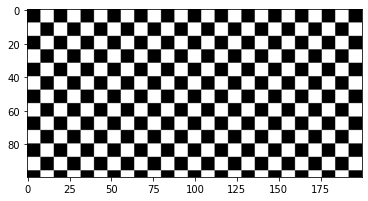

In [17]:
import numpy as np
from PIL import Image

array = np.zeros([100, 200], dtype=np.uint8)

# Set grey value to black or white depending on x position
for x in range(200):
    for y in range(100):
        if (x % 16) // 8 == (y % 16) // 8:
            array[y, x] = 0
        else:
            array[y, x] = 255

img = Image.fromarray(array)
img.save('testgrey.png')
plt.imshow(img, cmap='gray')

In this case, we have created a checkerboard image

## Reading images
You can read an image using the PIL open function, and convert it to an array using the numpy array function. Here, we read the images that were created previously, and print their NumPy shape:

In [18]:
import numpy as np
from PIL import Image

img = Image.open('testrgba.png')
array = np.array(img)
print(array.shape)      # (100, 200, 4)

img = Image.open('testrgb.png')
array = np.array(img)
print(array.shape)      # (100, 200, 3)

img = Image.open('testgrey.png')
array = np.array(img)
print(array.shape)      # (100, 200)

(100, 200, 4)
(100, 200, 3)
(100, 200)


You can manipulate the image data and write it back out to a file. For example, this code inverts a greyscale image (swapping black and white). and saves it back:

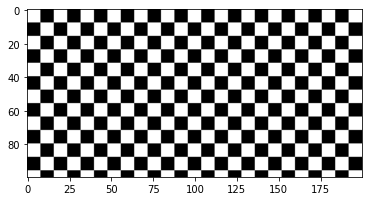

In [19]:
import numpy as np
from PIL import Image

img = Image.open('testgrey.png')
array = np.array(img)

array = 255 - array

invimg = Image.fromarray(array)
invimg.save('testgrey-inverted.png')
plt.imshow(invimg, cmap='gray')